In [ ]:
#https://www.kaggle.com/code/hvg730/social-phobia-analysis#Feature-Selection
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv(r'anxiety.csv', encoding='latin-1')
dataset.to_csv('anxiety.csv', index=False)
df = pd.DataFrame(dataset)
df

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,14246,42057.75678,1,0,0,1,0,1,1,Not difficult at all,...,France,France,Reddit,Multiplayer - online - with strangers,Accept,4,28,7.0,FRA,FRA
13460,14247,42057.81185,3,3,3,3,2,3,3,Extremely difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,20,23,25.0,USA,USA
13461,14248,42058.16964,0,0,0,0,0,0,0,Not difficult at all,...,Norway,Norway,Reddit,Multiplayer - online - with real life friends,Accept,0,32,10.0,NOR,NOR
13462,14249,42058.24420,3,2,1,3,0,1,3,Somewhat difficult,...,Canada,Canada,Reddit,Singleplayer,Accept,13,16,32.0,CAN,CAN


***Exploratory Data Analysis (EDA)***

In [ ]:
list(df.columns)


['S. No.',
 'Timestamp',
 'GAD1',
 'GAD2',
 'GAD3',
 'GAD4',
 'GAD5',
 'GAD6',
 'GAD7',
 'GADE',
 'SWL1',
 'SWL2',
 'SWL3',
 'SWL4',
 'SWL5',
 'Game',
 'Platform',
 'Hours',
 'earnings',
 'whyplay',
 'League',
 'highestleague',
 'streams',
 'SPIN1',
 'SPIN2',
 'SPIN3',
 'SPIN4',
 'SPIN5',
 'SPIN6',
 'SPIN7',
 'SPIN8',
 'SPIN9',
 'SPIN10',
 'SPIN11',
 'SPIN12',
 'SPIN13',
 'SPIN14',
 'SPIN15',
 'SPIN16',
 'SPIN17',
 'Narcissism',
 'Gender',
 'Age',
 'Work',
 'Degree',
 'Birthplace',
 'Residence',
 'Reference',
 'Playstyle',
 'accept',
 'GAD_T',
 'SWL_T',
 'SPIN_T',
 'Residence_ISO3',
 'Birthplace_ISO3']

In [ ]:
# General Information
df.info()
# Give the number of Rows and Column
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

(13464, 55)

In [ ]:
# Check for Null Values
df.isna().sum()

S. No.                 0
Timestamp              0
GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1852
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175


In [ ]:
# Calculate the mean , std, min max and count of every attributes
df.describe().T
# Checking Skewness from 'SPIN1' to 'SPIN17'

df_skew=df.loc[:,'SPIN1':'SPIN17']
df_skew=df_skew.select_dtypes([np.int64, np.float64])
for i, col in enumerate(df_skew.columns):
    print("\nSkewness of "+col +" is", df_skew[col].skew()) #measures skewness


Skewness of SPIN1 is 0.911855786661741

Skewness of SPIN2 is 0.6373608100970581

Skewness of SPIN3 is 0.8892361542760048

Skewness of SPIN4 is 0.2313269547925453

Skewness of SPIN5 is 0.7017718024402448

Skewness of SPIN6 is 0.6041271066925218

Skewness of SPIN7 is 0.9459408947241935

Skewness of SPIN8 is 0.5765628978146495

Skewness of SPIN9 is 0.40765371148040114

Skewness of SPIN10 is 1.1573066708431021

Skewness of SPIN11 is 0.16299179563459473

Skewness of SPIN12 is 1.2199536288805817

Skewness of SPIN13 is 1.8406606041145182

Skewness of SPIN14 is 0.7130767540693728

Skewness of SPIN15 is 0.5634434488768828

Skewness of SPIN16 is 1.6397891914434264

Skewness of SPIN17 is 1.1046526016052858


In [ ]:
# Calculate the mean , std, min max and count of every attributes
df.describe().T
# Checking Skewness from 'SPIN1' to 'SPIN17'

df_skew=df.loc[:,'SPIN1':'SPIN17']
df_skew=df_skew.select_dtypes([np.int64, np.float64])
for i, col in enumerate(df_skew.columns):
    print("\nSkewness of "+col +" is", df_skew[col].skew()) #measures skewnessis=1)
df = df.drop('S. No.', axis=1)
df = df.drop('Birthplace', axis=1)
df = df.drop('Residence', axis=1)
df = df.drop('SWL1', axis=1)
df = df.drop('SWL2', axis=1)
df = df.drop('SWL3', axis=1)
df = df.drop('SWL4', axis=1)
df = df.drop('SWL5', axis=1)
df.columns
df.describe().T


Skewness of SPIN1 is 0.911855786661741

Skewness of SPIN2 is 0.6373608100970581

Skewness of SPIN3 is 0.8892361542760048

Skewness of SPIN4 is 0.2313269547925453

Skewness of SPIN5 is 0.7017718024402448

Skewness of SPIN6 is 0.6041271066925218

Skewness of SPIN7 is 0.9459408947241935

Skewness of SPIN8 is 0.5765628978146495

Skewness of SPIN9 is 0.40765371148040114

Skewness of SPIN10 is 1.1573066708431021

Skewness of SPIN11 is 0.16299179563459473

Skewness of SPIN12 is 1.2199536288805817

Skewness of SPIN13 is 1.8406606041145182

Skewness of SPIN14 is 0.7130767540693728

Skewness of SPIN15 is 0.5634434488768828

Skewness of SPIN16 is 1.6397891914434264

Skewness of SPIN17 is 1.1046526016052858


,count,mean,std,min,25%,50%,75%,max
Timestamp,13464.0,42054.841222,0.272948,42052.00437,42054.716548,42054.800675,42054.932112,42058.36375
GAD1,13464.0,0.860963,0.926542,0.00000,0.000000,1.000000,1.000000,3.00000
GAD2,13464.0,0.673351,0.915724,0.00000,0.000000,0.000000,1.000000,3.00000
GAD3,13464.0,0.965761,0.982776,0.00000,0.000000,1.000000,2.000000,3.00000
GAD4,13464.0,0.724079,0.921971,0.00000,0.000000,0.000000,1.000000,3.00000
GAD5,13464.0,0.488042,0.837014,0.00000,0.000000,0.000000,1.000000,3.00000
GAD6,13464.0,0.911022,0.931168,0.00000,0.000000,1.000000,1.000000,3.00000
GAD7,13464.0,0.588755,0.894408,0.00000,0.000000,0.000000,1.000000,3.00000
Hours,13434.0,22.247357,70.284502,0.00000,12.000000,20.000000,28.000000,8000.00000
highestleague,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        # Identify outliers
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Mask outliers
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)

        # Remove outliers
        df.drop(df[outlier_mask].index, inplace=True)

# Specify columns to remove outliers from
columns_to_clean = ['Hours', 'streams','Age']

remove_outliers(df, columns_to_clean)
df_filtered = df
print(df_filtered)



         Timestamp  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
0      42052.00437     0     0     0     0     1     0     0   
3      42052.06804     0     0     0     0     0     0     0   
4      42052.08948     2     1     2     2     2     3     2   
5      42052.13119     0     0     0     0     0     1     0   
7      42052.15930     0     0     0     0     0     0     0   
...            ...   ...   ...   ...   ...   ...   ...   ...   
13459  42057.75678     1     0     0     1     0     1     1   
13460  42057.81185     3     3     3     3     2     3     3   
13461  42058.16964     0     0     0     0     0     0     0   
13462  42058.24420     3     2     1     3     0     1     3   
13463  42058.36375     1     1     0     0     0     0     0   

                       GADE               Game  ...  \
0      Not difficult at all             Skyrim  ...   
3      Not difficult at all              Other  ...   
4            Very difficult              Other  ...   
5      Not 

In [ ]:
# Calculate the mean , std, min max and count of every attributes After Remove Outliers
df_filtered.describe().T


,count,mean,std,min,25%,50%,75%,max
Timestamp,12217.0,42054.844267,0.269144,42052.00437,42054.71752,42054.80235,42054.9346,42058.36375
GAD1,12217.0,0.851600,0.914750,0.00000,0.00000,1.00000,1.0000,3.00000
GAD2,12217.0,0.664402,0.906123,0.00000,0.00000,0.00000,1.0000,3.00000
GAD3,12217.0,0.961202,0.972005,0.00000,0.00000,1.00000,2.0000,3.00000
GAD4,12217.0,0.713023,0.910979,0.00000,0.00000,0.00000,1.0000,3.00000
GAD5,12217.0,0.479823,0.825335,0.00000,0.00000,0.00000,1.0000,3.00000
GAD6,12217.0,0.894819,0.919476,0.00000,0.00000,1.00000,1.0000,3.00000
GAD7,12217.0,0.574200,0.878274,0.00000,0.00000,0.00000,1.0000,3.00000
Hours,12188.0,20.074910,10.680523,0.00000,12.00000,20.00000,25.0000,52.00000
highestleague,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Finding NUll Values
df_filtered.isna().sum()

Timestamp              0
GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 572
Game                   0
Platform               0
Hours                 29
earnings               0
whyplay                0
League              1628
highestleague      12217
streams               89
SPIN1                112
SPIN2                136
SPIN3                126
SPIN4                144
SPIN5                151
SPIN6                141
SPIN7                123
SPIN8                130
SPIN9                143
SPIN10               142
SPIN11               169
SPIN12               153
SPIN13               171
SPIN14               141
SPIN15               132
SPIN16               133
SPIN17               151
Narcissism            21
Gender                 0
Age                    0
Work                  36
Degree              1465
Reference              7


In [ ]:
columns_to_fill = [
    'Hours', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
    'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
    'Narcissism'
]

# Fill missing values with median
for column in columns_to_fill:
    df_filtered[column].fillna(df_filtered[column].median(), inplace=True)
    df_filtered[column] = df_filtered[column].astype('int64')


In [ ]:
df_filtered.isna().sum()

Timestamp              0
GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 572
Game                   0
Platform               0
Hours                  0
earnings               0
whyplay                0
League              1628
highestleague      12217
streams                0
SPIN1                  0
SPIN2                  0
SPIN3                  0
SPIN4                  0
SPIN5                  0
SPIN6                  0
SPIN7                  0
SPIN8                  0
SPIN9                  0
SPIN10                 0
SPIN11                 0
SPIN12                 0
SPIN13                 0
SPIN14                 0
SPIN15                 0
SPIN16                 0
SPIN17                 0
Narcissism             0
Gender                 0
Age                    0
Work                  36
Degree              1465
Reference              7


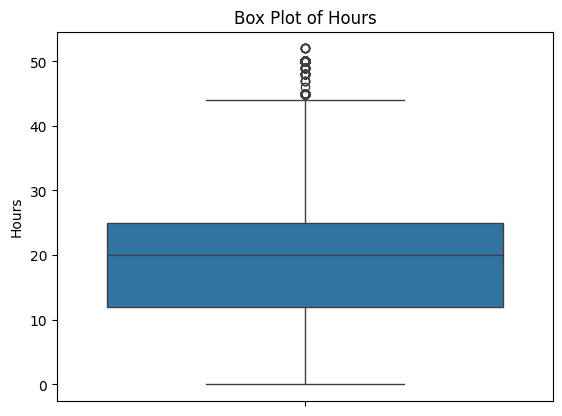

ValueError: List of boxplot statistics and `positions` values must have same the length

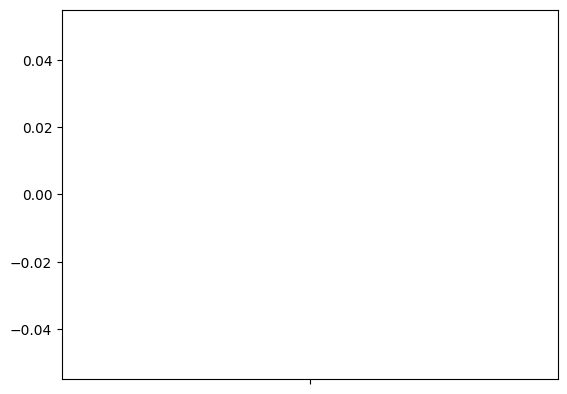

In [ ]:
df_filtered_box = df_filtered.loc[:, 'Platform':'Playstyle']
df_filtered_box = df_filtered_box.select_dtypes(include=[np.int64, np.float64])

# Plot box plots for each column
for i, col in enumerate(df_filtered_box.columns):
    plt.figure(i)
    sns.boxplot(y=col, data=df_filtered_box).set_title("Box Plot of " + col)
    plt.show()

<ipython-input-20-0527bd8cfc35>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


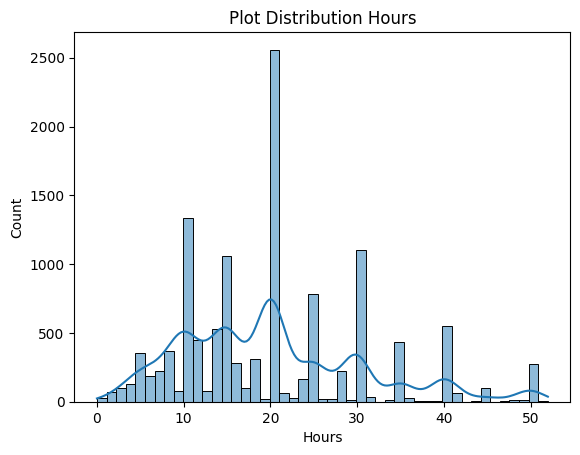

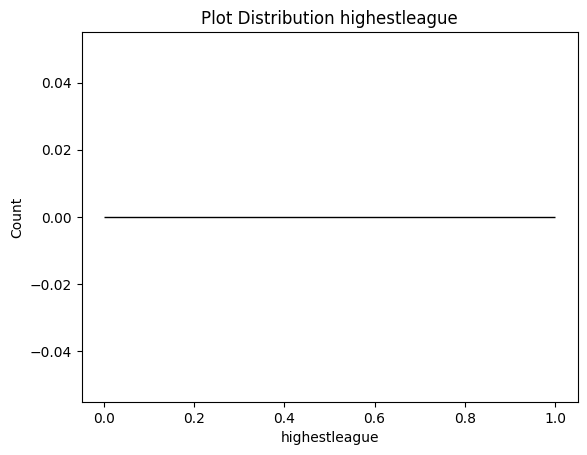

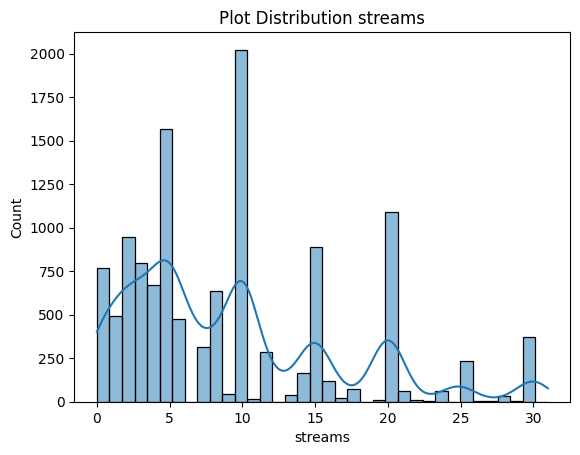

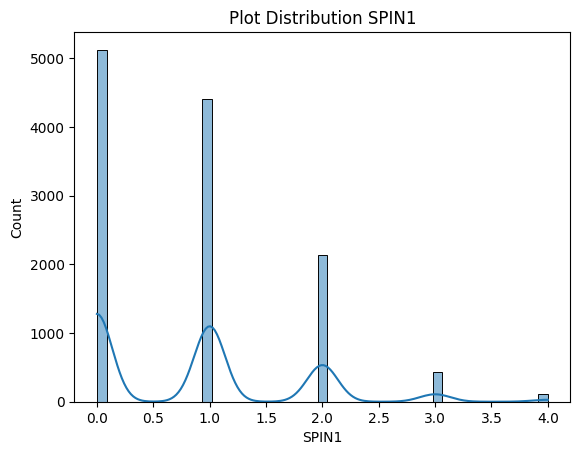

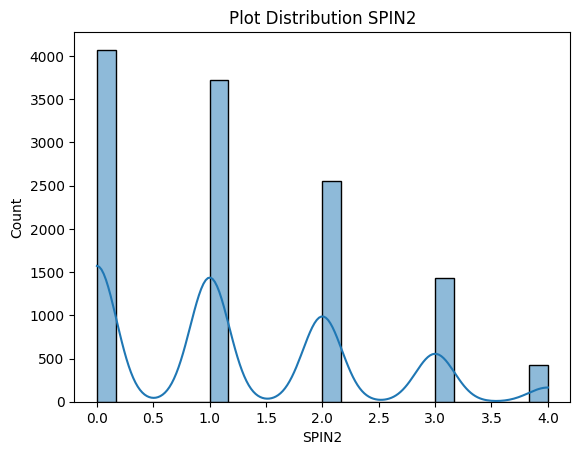

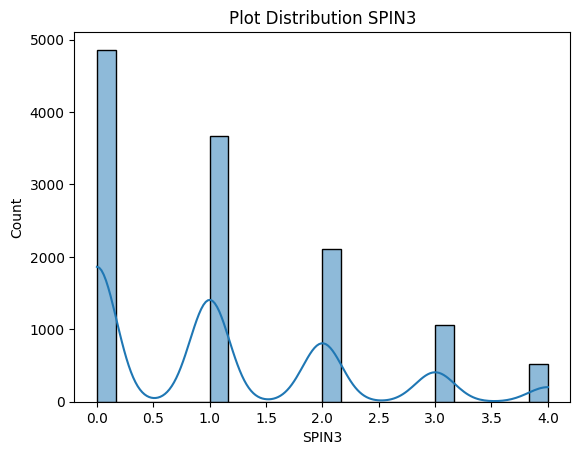

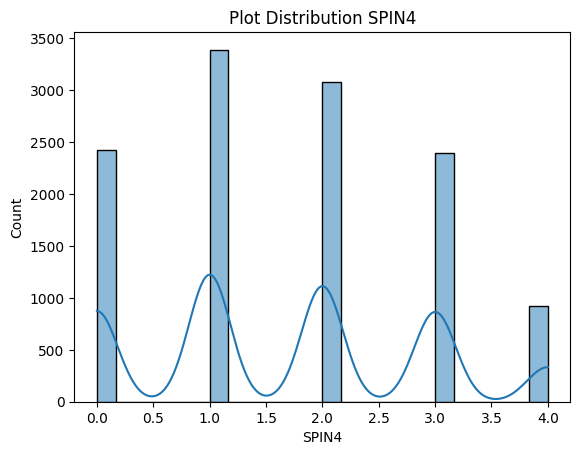

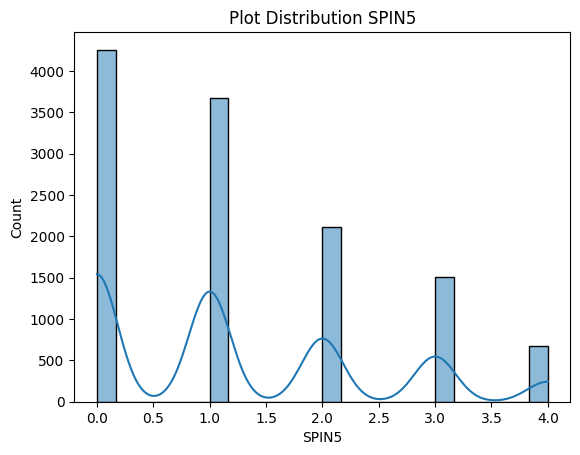

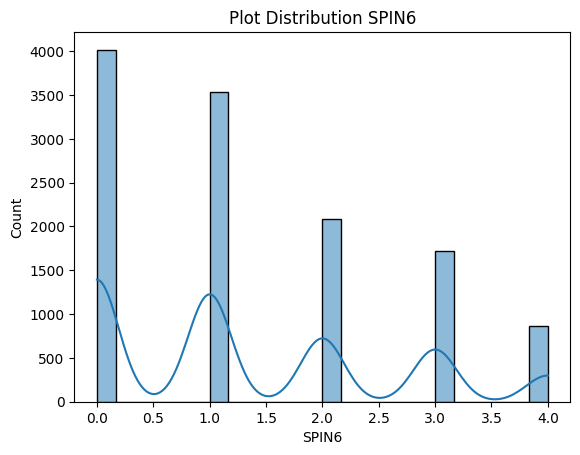

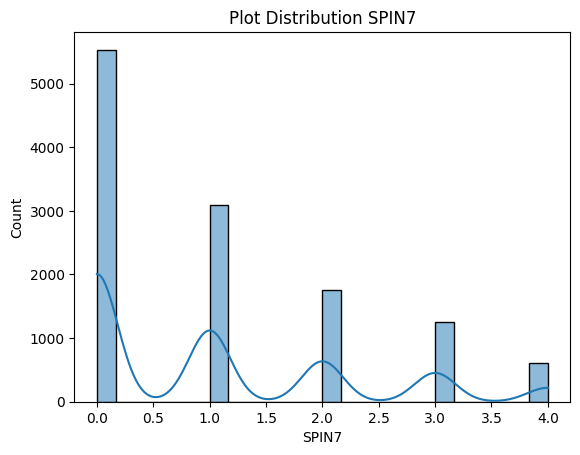

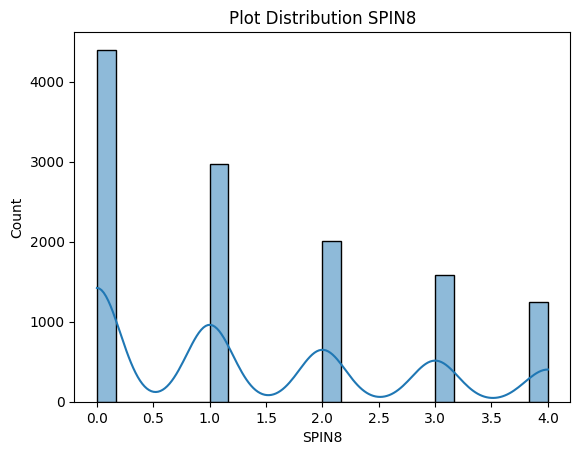

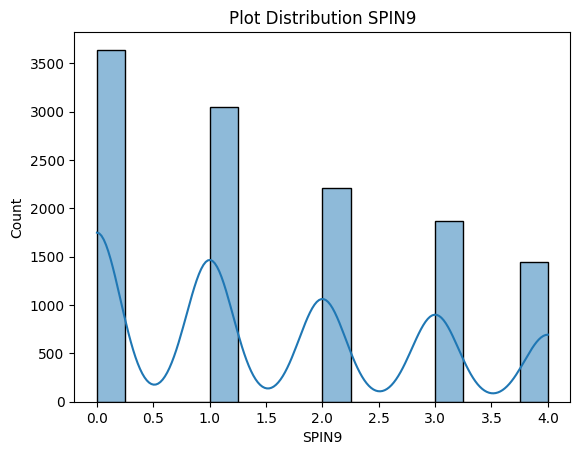

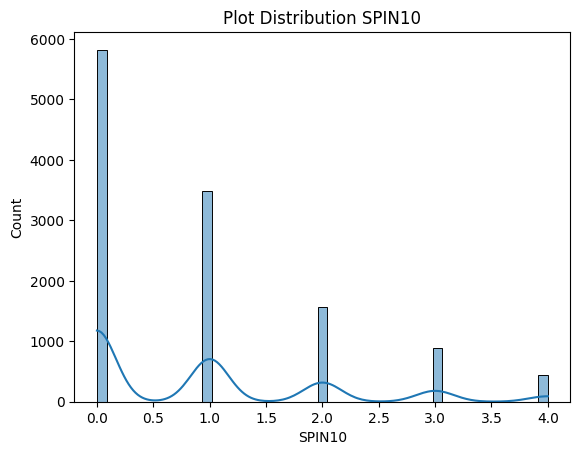

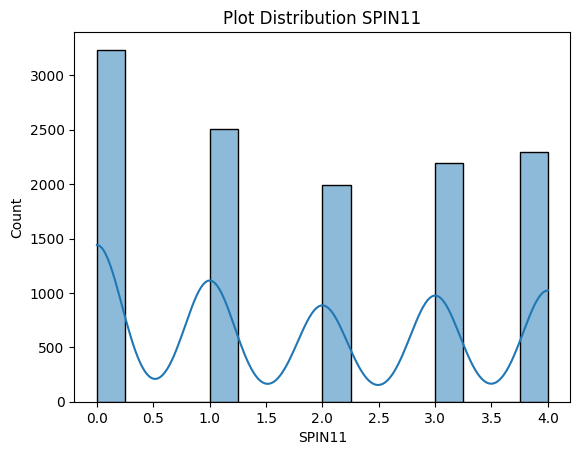

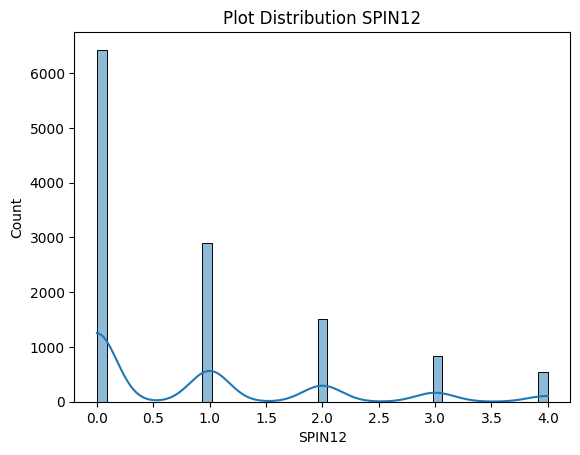

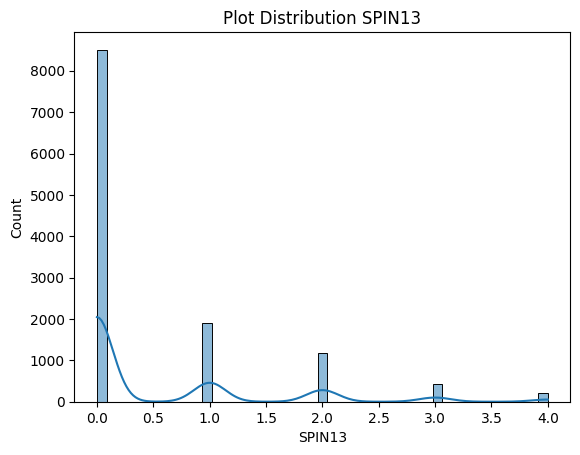

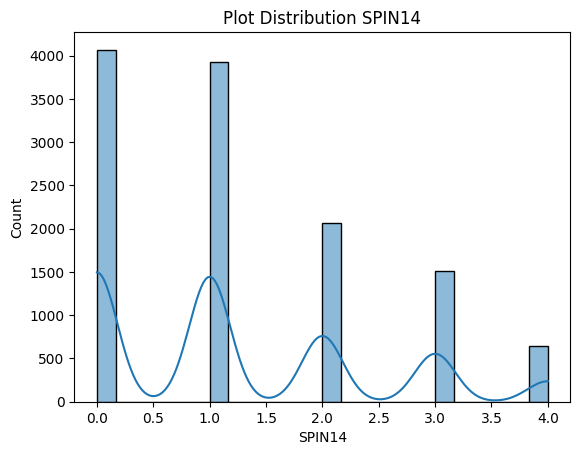

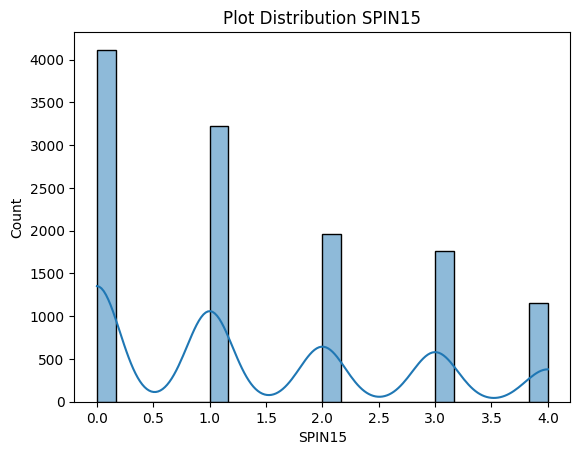

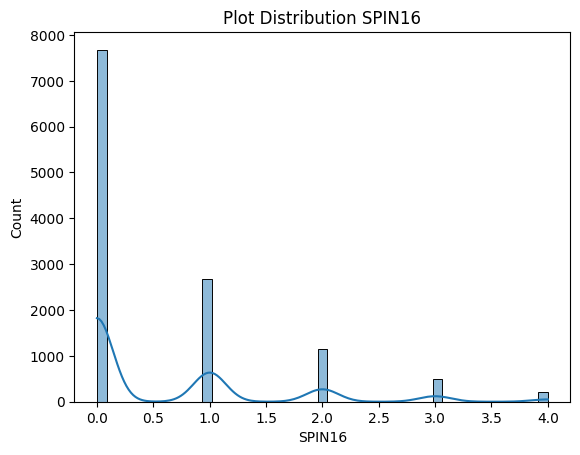

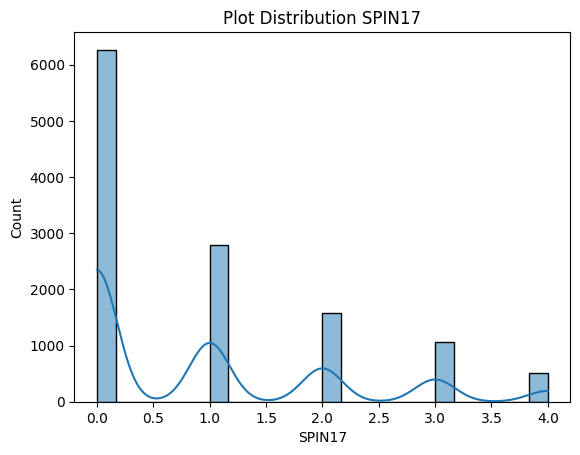

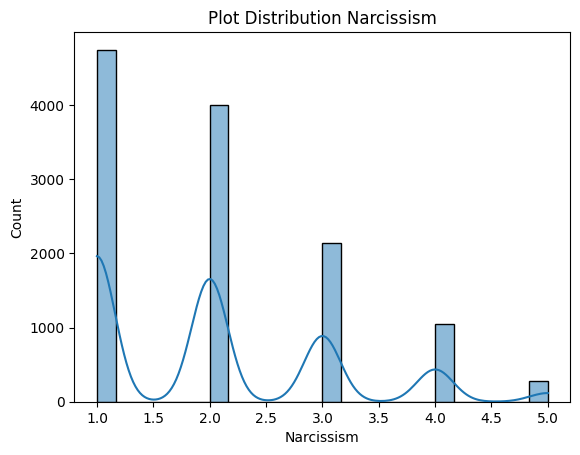

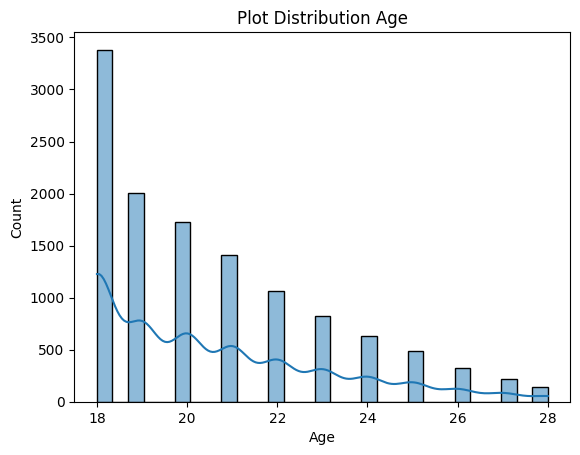

In [ ]:
df_filtered_box=df_filtered.loc[:,'Platform':'Playstyle']
df_filtered_box=df_filtered_box.select_dtypes([np.int64, np.float64])

for i, col in enumerate(df_filtered_box.columns):
    plt.figure(i)
    sns.histplot(x=col, data=df_filtered_box, kde=True).set_title("Plot Distribution "+col)

In [ ]:
# Correlation
df_filtered_corr=df_filtered.loc[:,'Platform':'Playstyle']
df_filtered_corr=df_filtered_corr.select_dtypes([np.int64, np.float64])
df_filtered_corr.corr()

,Hours,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,...,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Age
Hours,1.000000,NaN,0.091640,0.003897,0.016206,0.055052,0.060355,0.016372,0.060282,0.046342,...,0.047632,0.081848,0.042675,0.041365,0.056092,0.053258,0.037118,0.033491,0.062992,-0.078898
highestleague,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
streams,0.091640,NaN,1.000000,-0.007383,0.005449,0.035963,0.045489,0.012705,0.034114,0.014308,...,0.032992,0.026733,0.014153,0.023454,0.019285,0.019953,0.006694,0.021966,0.023901,0.048043
SPIN1,0.003897,NaN,-0.007383,1.000000,0.313632,0.297455,0.254394,0.312610,0.317526,0.226573,...,0.307185,0.219992,0.280527,0.239351,0.316964,0.293015,0.477602,0.277337,0.030756,-0.046552
SPIN2,0.016206,NaN,0.005449,0.313632,1.000000,0.369077,0.329885,0.328237,0.421862,0.362386,...,0.353964,0.313070,0.286672,0.304057,0.394055,0.410164,0.294106,0.401900,-0.010407,-0.094556
SPIN3,0.055052,NaN,0.035963,0.297455,0.369077,1.000000,0.563422,0.376792,0.538802,0.342227,...,0.567071,0.382866,0.329595,0.366128,0.502617,0.419133,0.378541,0.385748,-0.005222,-0.051531
SPIN4,0.060355,NaN,0.045489,0.254394,0.329885,0.563422,1.000000,0.346157,0.545295,0.294764,...,0.612507,0.423169,0.277747,0.293167,0.465209,0.380676,0.366332,0.325482,0.005411,-0.059536
SPIN5,0.016372,NaN,0.012705,0.312610,0.328237,0.376792,0.346157,1.000000,0.541340,0.344473,...,0.423503,0.282729,0.655107,0.353196,0.473746,0.515857,0.353182,0.374918,0.023438,-0.037308
SPIN6,0.060282,NaN,0.034114,0.317526,0.421862,0.538802,0.545295,0.541340,1.000000,0.425454,...,0.580252,0.451325,0.467641,0.393299,0.590088,0.574494,0.414549,0.428974,-0.010603,-0.105663
SPIN7,0.046342,NaN,0.014308,0.226573,0.362386,0.342227,0.294764,0.344473,0.425454,1.000000,...,0.357033,0.271504,0.326170,0.392951,0.420888,0.400280,0.298172,0.463325,0.020573,-0.087900


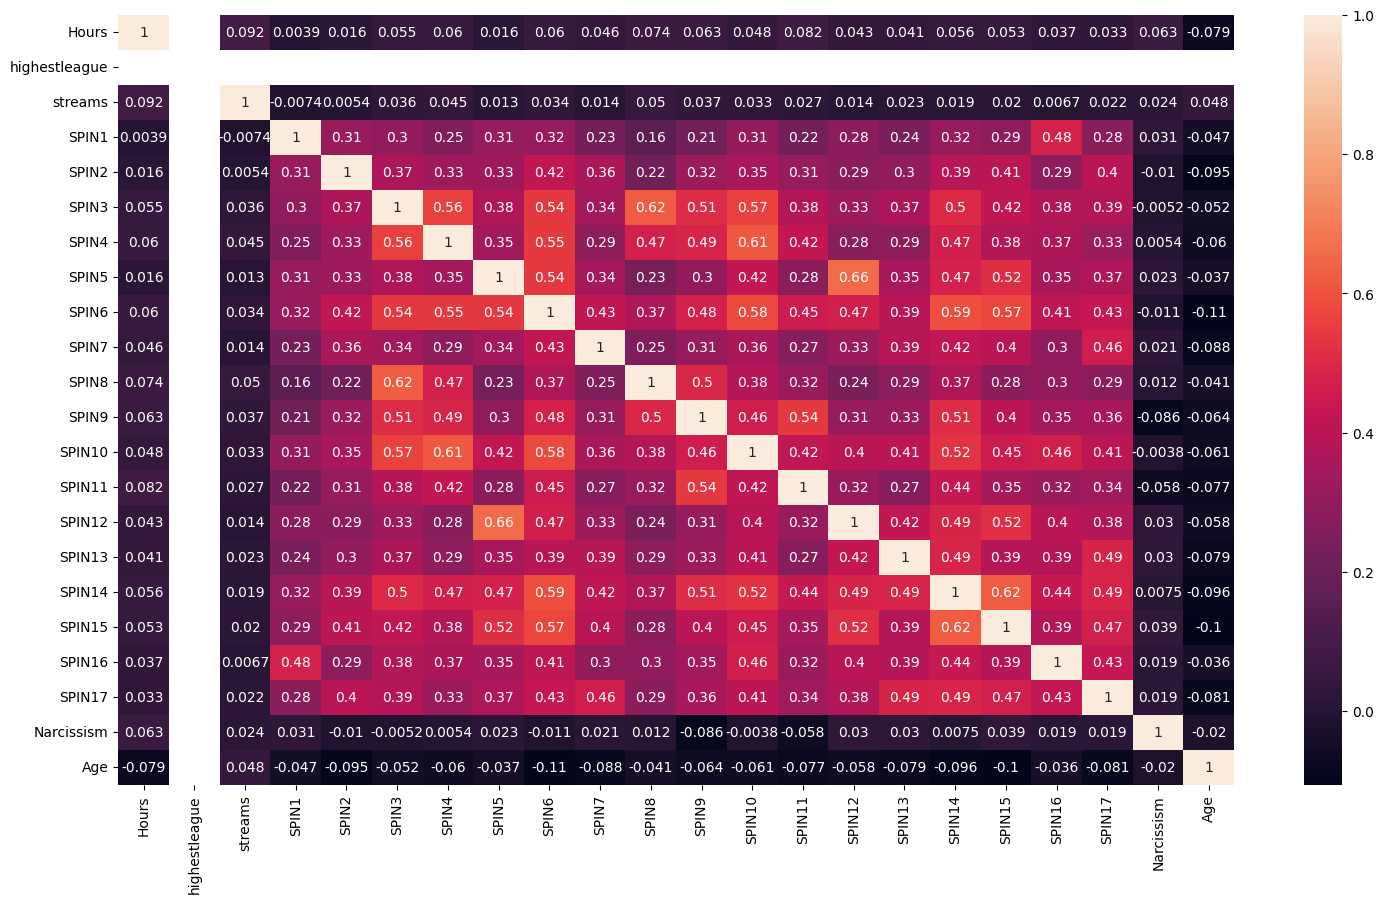

In [ ]:
#ploting the heatmap for correlation
plt.figure(figsize=(18,10))
df_filtered_corr=df_filtered_corr.corr()
correlation_heatMap = sns.heatmap(df_filtered_corr, annot=True)

In [ ]:
df_filtered_corr

,Hours,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,...,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Age
Hours,1.000000,NaN,0.091640,0.003897,0.016206,0.055052,0.060355,0.016372,0.060282,0.046342,...,0.047632,0.081848,0.042675,0.041365,0.056092,0.053258,0.037118,0.033491,0.062992,-0.078898
highestleague,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
streams,0.091640,NaN,1.000000,-0.007383,0.005449,0.035963,0.045489,0.012705,0.034114,0.014308,...,0.032992,0.026733,0.014153,0.023454,0.019285,0.019953,0.006694,0.021966,0.023901,0.048043
SPIN1,0.003897,NaN,-0.007383,1.000000,0.313632,0.297455,0.254394,0.312610,0.317526,0.226573,...,0.307185,0.219992,0.280527,0.239351,0.316964,0.293015,0.477602,0.277337,0.030756,-0.046552
SPIN2,0.016206,NaN,0.005449,0.313632,1.000000,0.369077,0.329885,0.328237,0.421862,0.362386,...,0.353964,0.313070,0.286672,0.304057,0.394055,0.410164,0.294106,0.401900,-0.010407,-0.094556
SPIN3,0.055052,NaN,0.035963,0.297455,0.369077,1.000000,0.563422,0.376792,0.538802,0.342227,...,0.567071,0.382866,0.329595,0.366128,0.502617,0.419133,0.378541,0.385748,-0.005222,-0.051531
SPIN4,0.060355,NaN,0.045489,0.254394,0.329885,0.563422,1.000000,0.346157,0.545295,0.294764,...,0.612507,0.423169,0.277747,0.293167,0.465209,0.380676,0.366332,0.325482,0.005411,-0.059536
SPIN5,0.016372,NaN,0.012705,0.312610,0.328237,0.376792,0.346157,1.000000,0.541340,0.344473,...,0.423503,0.282729,0.655107,0.353196,0.473746,0.515857,0.353182,0.374918,0.023438,-0.037308
SPIN6,0.060282,NaN,0.034114,0.317526,0.421862,0.538802,0.545295,0.541340,1.000000,0.425454,...,0.580252,0.451325,0.467641,0.393299,0.590088,0.574494,0.414549,0.428974,-0.010603,-0.105663
SPIN7,0.046342,NaN,0.014308,0.226573,0.362386,0.342227,0.294764,0.344473,0.425454,1.000000,...,0.357033,0.271504,0.326170,0.392951,0.420888,0.400280,0.298172,0.463325,0.020573,-0.087900


In [ ]:
# Feature Variables
df_filtered['Fear_Component'] = df_filtered[['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6']].median(axis=1).round().astype('int64')
df_filtered['Avoidance_Component'] = df_filtered[['SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13']].median(axis=1).round().astype('int64')
df_filtered['Physiological_Discomfort_Component'] = df_filtered[['SPIN14', 'SPIN15', 'SPIN16', 'SPIN17']].median(axis=1).round().astype('int64')

In [ ]:
# Target Variables
df_filtered['Social_Phobia_Level'] = df_filtered[['Fear_Component', 'Avoidance_Component', 'Physiological_Discomfort_Component']].mean(axis=1).round().astype('int64')
# print(df_filtered['Social_Phobia_Level'])

In [ ]:
# Features and target variable
features = df_filtered[['Fear_Component', 'Avoidance_Component', 'Physiological_Discomfort_Component']]
print(features)
target = df_filtered['Social_Phobia_Level']

       Fear_Component  Avoidance_Component  Physiological_Discomfort_Component
0                   0                    0                                   0
3                   0                    0                                   0
4                   0                    0                                   0
5                   2                    0                                   0
7                   0                    0                                   0
...               ...                  ...                                 ...
13459               1                    0                                   0
13460               1                    2                                   1
13461               0                    1                                   0
13462               2                    1                                   2
13463               1                    0                                   1

[12217 rows x 3 columns]


In [ ]:
# Listing the number of rows and columns
features.shape, target.shape
print(features)

       Fear_Component  Avoidance_Component  Physiological_Discomfort_Component
0                   0                    0                                   0
3                   0                    0                                   0
4                   0                    0                                   0
5                   2                    0                                   0
7                   0                    0                                   0
...               ...                  ...                                 ...
13459               1                    0                                   0
13460               1                    2                                   1
13461               0                    1                                   0
13462               2                    1                                   2
13463               1                    0                                   1

[12217 rows x 3 columns]


In [ ]:
print(target)

0        0
3        0
4        0
5        1
7        0
        ..
13459    0
13460    1
13461    0
13462    2
13463    1
Name: Social_Phobia_Level, Length: 12217, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Check the shape of x_train, x_test, y_train, y_test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9773, 3), (2444, 3), (9773,), (2444,))

Fitting 9 folds for each of 90 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


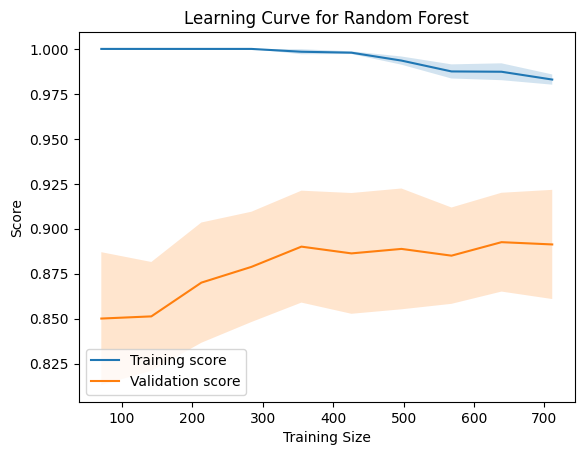

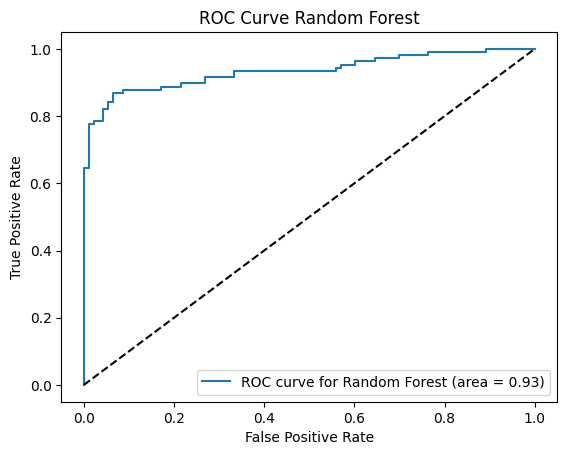

Training time: 462.81 seconds
CPU usage: 85.80%
Memory usage: 1.00%
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
AUC: 0.93

Hyper-parameter Space Exploration:
Best parameters found by GridSearchCV: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Grid Search ran with 90 parameter combinations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)



# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train = train.drop(columns=['Social_Phobia_Level'])
y_train = train['Social_Phobia_Level']
X_test_unscaled_rf = test.drop(columns=['Social_Phobia_Level'])
y_test_rf = test['Social_Phobia_Level']

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test_unscaled_rf)

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize RandomForestClassifier and GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=9, verbose=2, n_jobs=-1)

# Measure training time and resources
start_time = time.time()
start_cpu = psutil.cpu_percent(interval=None)
start_memory = psutil.virtual_memory().percent

grid_search.fit(X_train, y_train)

end_time = time.time()
end_cpu = psutil.cpu_percent(interval=None)
end_memory = psutil.virtual_memory().percent

training_time = end_time - start_time
cpu_usage = end_cpu - start_cpu
memory_usage = end_memory - start_memory

# Best model from grid search
best_rf = grid_search.best_estimator_

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train, y_train, cv=9, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Predictions and performance metrics
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test_rf, y_pred)
precision = precision_score(y_test_rf, y_pred, average='micro')
recall = recall_score(y_test_rf, y_pred, average='micro')
f1 = f1_score(y_test_rf, y_pred, average='micro')
roc_auc = roc_auc_score(y_test_rf, y_proba)

fpr, tpr, _ = roc_curve(y_test_rf, y_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve for Random Forest (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend(loc='best')
plt.show()

# Print metrics
print(f"Training time: {training_time:.2f} seconds")
print(f"CPU usage: {cpu_usage:.2f}%")
print(f"Memory usage: {memory_usage:.2f}%")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")
# Hyper-parameter space exploration
print("\nHyper-parameter Space Exploration:")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Grid Search ran with {len(grid_search.cv_results_['params'])} parameter combinations.")



Fitting 9 folds for each of 135 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(



Grid Search Results:
Best parameters found by GridSearchCV: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Grid Search ran with 135 parameter combinations.
Training time: 19.90 seconds
CPU usage: 82.80%
Memory usage: 0.40%


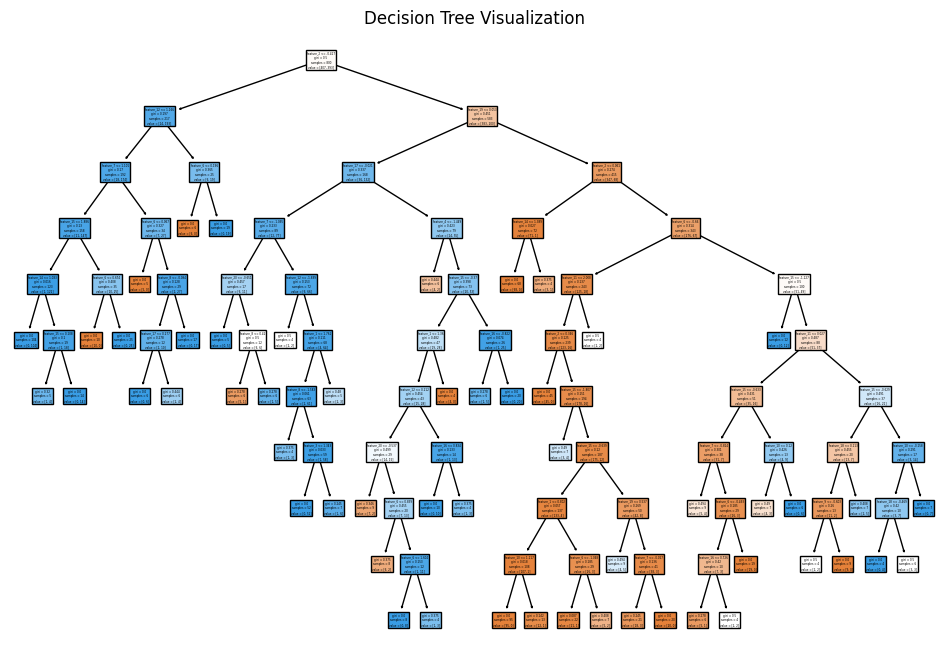

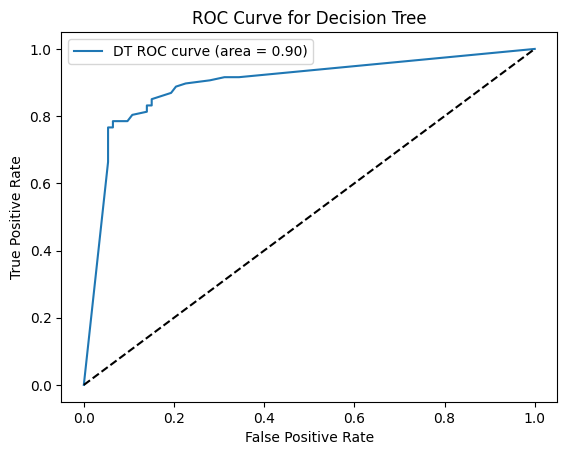

Metrics for Decision Tree:
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84
AUC: 0.90


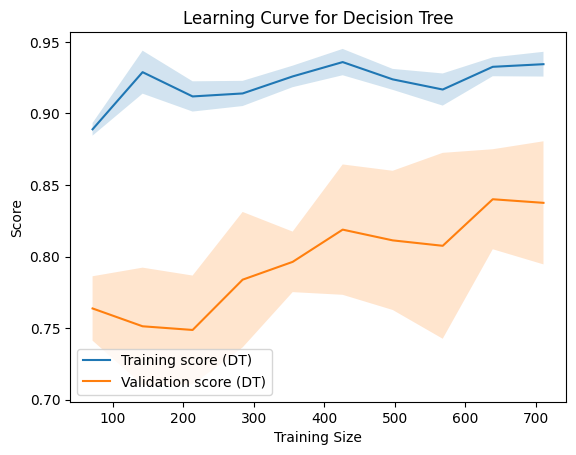

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)



# Parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize DecisionTreeClassifier and GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=9,
                           verbose=2,
                           n_jobs=-1)

# Measure training time and resources for GridSearchCV
start_time_gs = time.time()
start_cpu_gs = psutil.cpu_percent(interval=None)
start_memory_gs = psutil.virtual_memory().percent

grid_search.fit(X_train, y_train)

end_time_gs = time.time()
end_cpu_gs = psutil.cpu_percent(interval=None)
end_memory_gs = psutil.virtual_memory().percent

training_time_gs = end_time_gs - start_time_gs
cpu_usage_gs = end_cpu_gs - start_cpu_gs
memory_usage_gs = end_memory_gs - start_memory_gs

# Best model from grid search
best_dt = grid_search.best_estimator_

# Print grid search results
print("\nGrid Search Results:")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Grid Search ran with {len(grid_search.cv_results_['params'])} parameter combinations.")
print(f"Training time: {training_time_gs:.2f} seconds")
print(f"CPU usage: {cpu_usage_gs:.2f}%")
print(f"Memory usage: {memory_usage_gs:.2f}%")

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt, filled=True, feature_names=data.drop(columns=['Social_Phobia_Level']).columns)
plt.title('Decision Tree Visualization')
plt.show()

# Predictions and performance metrics for Decision Tree
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

accuracy_dt = accuracy_score(y_test_rf, y_pred_dt)
precision_dt = precision_score(y_test_rf, y_pred_dt, average='micro')
recall_dt = recall_score(y_test_rf, y_pred_dt, average='micro')
f1_dt = f1_score(y_test_rf, y_pred_dt, average='micro')
roc_auc_dt = roc_auc_score(y_test_rf, y_proba_dt)

# Plot ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_rf, y_proba_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f'DT ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='best')
plt.show()

# Print metrics for Decision Tree
print("Metrics for Decision Tree:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")
print(f"AUC: {roc_auc_dt:.2f}")

# Compute learning curve for Decision Tree
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(
    best_dt, X_train, y_train, cv=9, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean_dt = np.mean(train_scores_dt, axis=1)
train_std_dt = np.std(train_scores_dt, axis=1)
test_mean_dt = np.mean(test_scores_dt, axis=1)
test_std_dt = np.std(test_scores_dt, axis=1)

# Plot learning curve for Decision Tree
plt.figure()
plt.plot(train_sizes_dt, train_mean_dt, label='Training score (DT)')
plt.plot(train_sizes_dt, test_mean_dt, label='Validation score (DT)')
plt.fill_between(train_sizes_dt, train_mean_dt - train_std_dt, train_mean_dt + train_std_dt, alpha=0.2)
plt.fill_between(train_sizes_dt, test_mean_dt - test_std_dt, test_mean_dt + test_std_dt, alpha=0.2)
plt.title('Learning Curve for Decision Tree')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


Fitting 9 folds for each of 24 candidates, totalling 216 fits


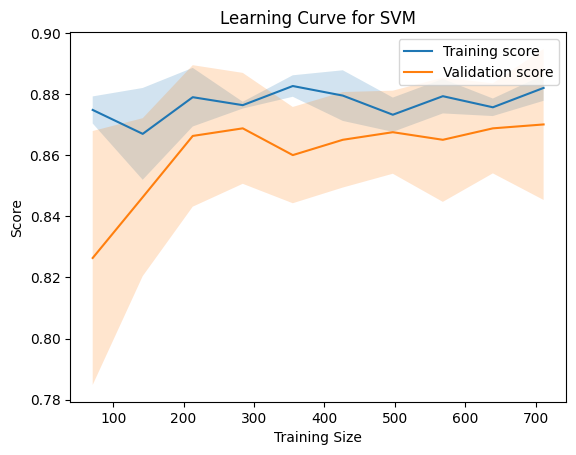

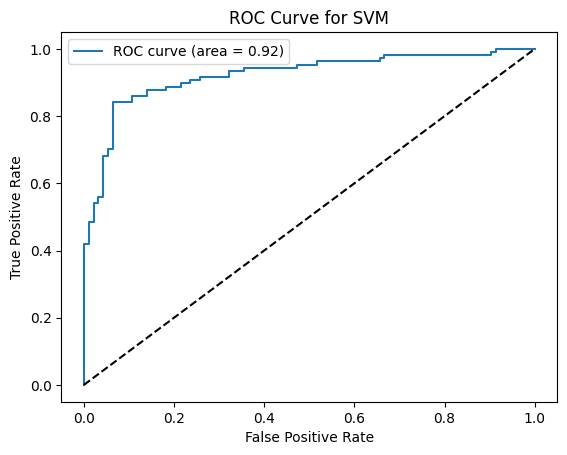

Training time: 44.59 seconds
CPU usage: 78.00%
Memory usage: 1.70%
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
AUC: 0.92

Hyper-parameter Space Exploration:
Best parameters found by GridSearchCV: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Grid Search ran with 24 parameter combinations.

Effects of Regularizers (C values):
Mean Test Score: 0.859 for Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mean Test Score: 0.856 for Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Test Score: 0.853 for Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Mean Test Score: 0.509 for Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Mean Test Score: 0.859 for Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Mean Test Score: 0.569 for Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Test Score: 0.509 for Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Mean Test Score: 0.509 for Parameters: {'C': 0.1, 'g

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

# Load your dataset
# data = pd.read_csv('your_dataset.csv')

# For demonstration, let's use a synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Create DataFrame to simulate your data structure
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 21)])
data['Social_Phobia_Level'] = y

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train = train.drop(columns=['Social_Phobia_Level'])
y_train = train['Social_Phobia_Level']
X_test_unscaled_svm = test.drop(columns=['Social_Phobia_Level'])
y_test_svm = test['Social_Phobia_Level']

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test_unscaled_svm)

# Parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize SVM and GridSearchCV
svm = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=9, verbose=2, n_jobs=-1)

# Measure training time and resources
start_time = time.time()
start_cpu = psutil.cpu_percent(interval=None)
start_memory = psutil.virtual_memory().percent

grid_search.fit(X_train, y_train)

end_time = time.time()
end_cpu = psutil.cpu_percent(interval=None)
end_memory = psutil.virtual_memory().percent

training_time = end_time - start_time
cpu_usage = end_cpu - start_cpu
memory_usage = end_memory - start_memory

# Best model from grid search
best_svm = grid_search.best_estimator_

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_svm, X_train, y_train, cv=9, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve for SVM')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Predictions and performance metrics
y_pred = best_svm.predict(X_test)
y_proba = best_svm.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test_svm, y_pred)
precision = precision_score(y_test_svm, y_pred, average='micro')
recall = recall_score(y_test_svm, y_pred, average='micro')
f1 = f1_score(y_test_svm, y_pred, average='micro')
roc_auc = roc_auc_score(y_test_svm, y_proba)

fpr, tpr, _ = roc_curve(y_test_svm, y_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='best')
plt.show()

# Print metrics
print(f"Training time: {training_time:.2f} seconds")
print(f"CPU usage: {cpu_usage:.2f}%")
print(f"Memory usage: {memory_usage:.2f}%")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Hyper-parameter space exploration
print("\nHyper-parameter Space Exploration:")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Grid Search ran with {len(grid_search.cv_results_['params'])} parameter combinations.")

# Effects of the regularizers
print("\nEffects of Regularizers (C values):")
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    if 'C' in params:
        print(f"Mean Test Score: {mean_score:.3f} for Parameters: {params}")


Fitting 9 folds for each of 12 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

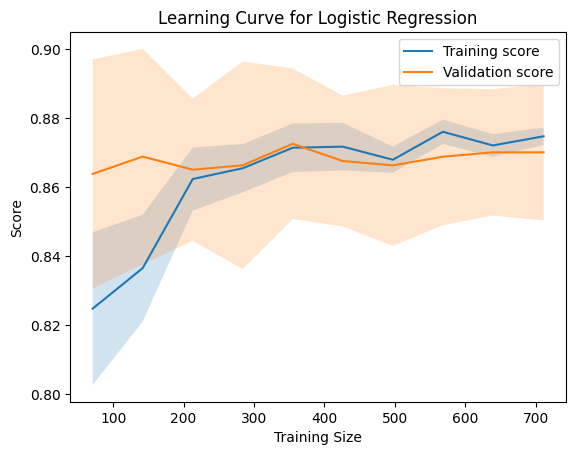

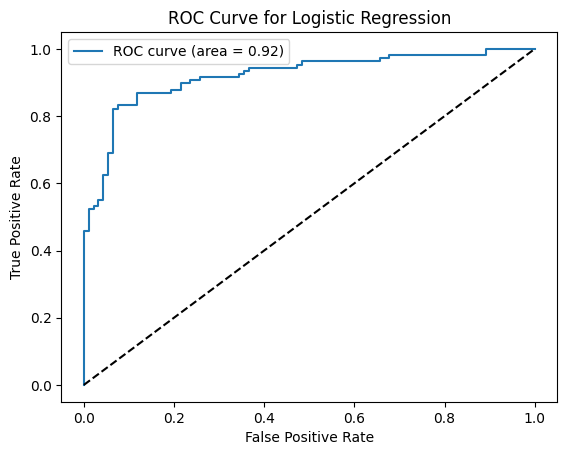

Training time: 8.07 seconds
CPU usage: 86.50%
Memory usage: 1.40%
Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1 Score: 0.87
AUC: 0.92

Hyper-parameter Space Exploration:
Best parameters found by GridSearchCV: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Grid Search ran with 12 parameter combinations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Create DataFrame to simulate your data structure
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 21)])
data['Social_Phobia_Level'] = y

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train = train.drop(columns=['Social_Phobia_Level'])
y_train = train['Social_Phobia_Level']
X_test = test.drop(columns=['Social_Phobia_Level'])
y_test = test['Social_Phobia_Level']

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

# Initialize Logistic Regression and GridSearchCV
logreg = LogisticRegression(random_state=42, max_iter=10000)
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=9, verbose=2, n_jobs=-1)

# Measure training time and resources
start_time = time.time()
start_cpu = psutil.cpu_percent(interval=None)
start_memory = psutil.virtual_memory().percent

grid_search.fit(X_train_scaled, y_train)

end_time = time.time()
end_cpu = psutil.cpu_percent(interval=None)
end_memory = psutil.virtual_memory().percent

training_time = end_time - start_time
cpu_usage = end_cpu - start_cpu
memory_usage = end_memory - start_memory

# Best model from grid search
best_logreg = grid_search.best_estimator_

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_logreg, X_train_scaled, y_train, cv=9, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Predictions and performance metrics
y_pred = best_logreg.predict(X_test_scaled)
y_proba = best_logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='best')
plt.show()

# Print metrics
print(f"Training time: {training_time:.2f} seconds")
print(f"CPU usage: {cpu_usage:.2f}%")
print(f"Memory usage: {memory_usage:.2f}%")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Hyper-parameter space exploration
print("\nHyper-parameter Space Exploration:")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Grid Search ran with {len(grid_search.cv_results_['params'])} parameter combinations.")


Fitting 9 folds for each of 27 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


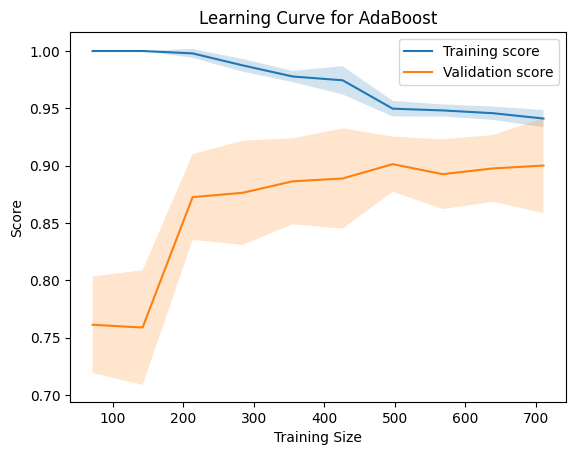

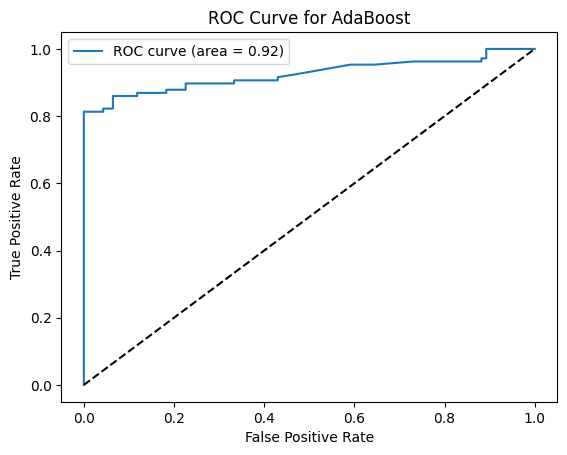

Training time: 161.38 seconds
CPU usage: 85.40%
Memory usage: 0.50%
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
AUC: 0.92

Hyper-parameter Space Exploration:
Best parameters found by GridSearchCV: {'base_estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100}
Grid Search ran with 27 parameter combinations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Create DataFrame to simulate your data structure
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 21)])
data['Social_Phobia_Level'] = y

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train = train.drop(columns=['Social_Phobia_Level'])
y_train = train['Social_Phobia_Level']
X_test = test.drop(columns=['Social_Phobia_Level'])
y_test = test['Social_Phobia_Level']

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}

# Initialize AdaBoostClassifier with DecisionTreeClassifier as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=9, verbose=2, n_jobs=-1)

# Measure training time and resources
start_time = time.time()
start_cpu = psutil.cpu_percent(interval=None)
start_memory = psutil.virtual_memory().percent

grid_search.fit(X_train_scaled, y_train)

end_time = time.time()
end_cpu = psutil.cpu_percent(interval=None)
end_memory = psutil.virtual_memory().percent

training_time = end_time - start_time
cpu_usage = end_cpu - start_cpu
memory_usage = end_memory - start_memory

# Best model from grid search
best_ada_boost = grid_search.best_estimator_

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_ada_boost, X_train_scaled, y_train, cv=9, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve for AdaBoost')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Predictions and performance metrics
y_pred = best_ada_boost.predict(X_test_scaled)
y_proba = best_ada_boost.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='best')
plt.show()

# Print metrics
print(f"Training time: {training_time:.2f} seconds")
print(f"CPU usage: {cpu_usage:.2f}%")
print(f"Memory usage: {memory_usage:.2f}%")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Hyper-parameter space exploration
print("\nHyper-parameter Space Exploration:")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Grid Search ran with {len(grid_search.cv_results_['params'])} parameter combinations.")


Fitting 9 folds for each of 27 candidates, totalling 243 fits


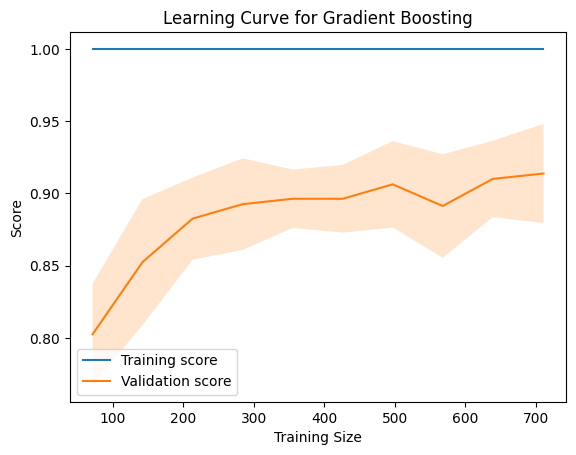

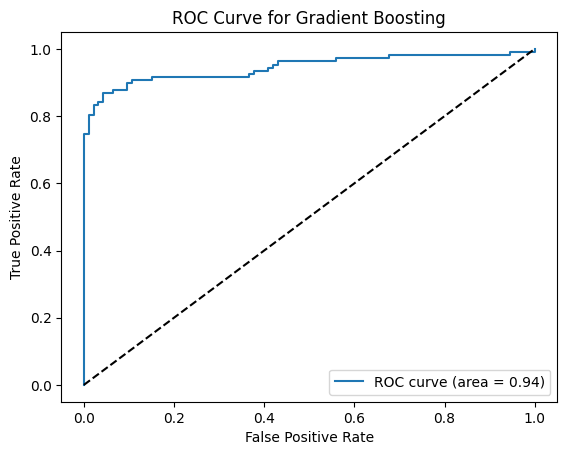

Training time: 189.97 seconds
CPU usage: 42.20%
Memory usage: -0.40%
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
AUC: 0.94

Hyper-parameter Space Exploration:
Best parameters found by GridSearchCV: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Grid Search ran with 27 parameter combinations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Create DataFrame to simulate your data structure
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 21)])
data['Social_Phobia_Level'] = y

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train = train.drop(columns=['Social_Phobia_Level'])
y_train = train['Social_Phobia_Level']
X_test = test.drop(columns=['Social_Phobia_Level'])
y_test = test['Social_Phobia_Level']

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

# Initialize GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boost, param_grid=param_grid, cv=9, verbose=2, n_jobs=-1)

# Measure training time and resources
start_time = time.time()
start_cpu = psutil.cpu_percent(interval=None)
start_memory = psutil.virtual_memory().percent

grid_search.fit(X_train_scaled, y_train)

end_time = time.time()
end_cpu = psutil.cpu_percent(interval=None)
end_memory = psutil.virtual_memory().percent

training_time = end_time - start_time
cpu_usage = end_cpu - start_cpu
memory_usage = end_memory - start_memory

# Best model from grid search
best_gradient_boost = grid_search.best_estimator_

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_gradient_boost, X_train_scaled, y_train, cv=9, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve for Gradient Boosting')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Predictions and performance metrics
y_pred = best_gradient_boost.predict(X_test_scaled)
y_proba = best_gradient_boost.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='best')
plt.show()

# Print metrics
print(f"Training time: {training_time:.2f} seconds")
print(f"CPU usage: {cpu_usage:.2f}%")
print(f"Memory usage: {memory_usage:.2f}%")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Hyper-parameter space exploration
print("\nHyper-parameter Space Exploration:")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Grid Search ran with {len(grid_search.cv_results_['params'])} parameter combinations.")


Fitting 9 folds for each of 27 candidates, totalling 243 fits


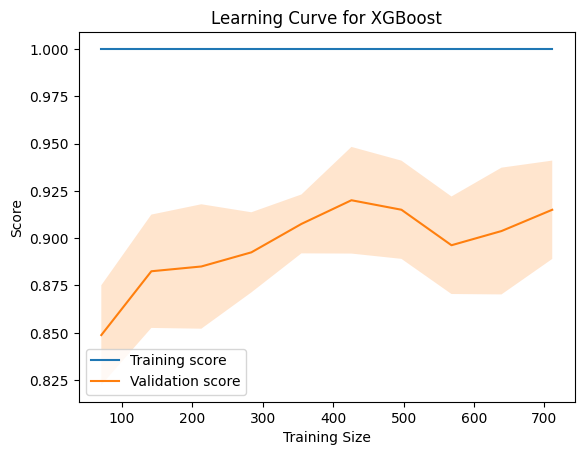

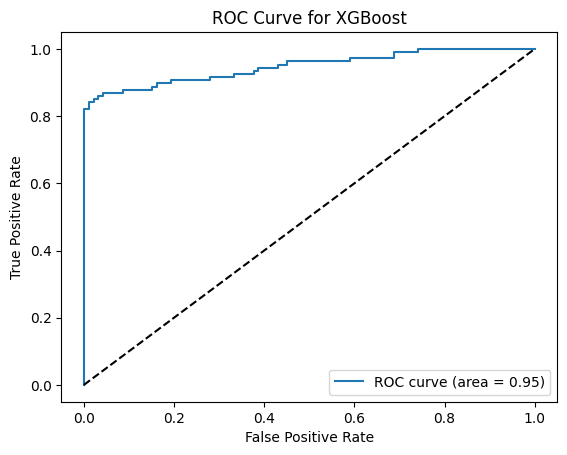

Training time: 53.69 seconds
CPU usage: 67.70%
Memory usage: 0.40%
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
AUC: 0.95

Hyper-parameter Space Exploration:
Best parameters found by GridSearchCV: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Grid Search ran with 27 parameter combinations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Create DataFrame to simulate your data structure
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 21)])
data['Social_Phobia_Level'] = y

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train = train.drop(columns=['Social_Phobia_Level'])
y_train = train['Social_Phobia_Level']
X_test = test.drop(columns=['Social_Phobia_Level'])
y_test = test['Social_Phobia_Level']

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

# Initialize XGBClassifier
xgb = XGBClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=9, verbose=2, n_jobs=-1)

# Measure training time and resources
start_time = time.time()
start_cpu = psutil.cpu_percent(interval=None)
start_memory = psutil.virtual_memory().percent

grid_search.fit(X_train_scaled, y_train)

end_time = time.time()
end_cpu = psutil.cpu_percent(interval=None)
end_memory = psutil.virtual_memory().percent

training_time = end_time - start_time
cpu_usage = end_cpu - start_cpu
memory_usage = end_memory - start_memory

# Best model from grid search
best_xgb = grid_search.best_estimator_

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_xgb, X_train_scaled, y_train, cv=9, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve for XGBoost')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Predictions and performance metrics
y_pred = best_xgb.predict(X_test_scaled)
y_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='best')
plt.show()

# Print metrics
print(f"Training time: {training_time:.2f} seconds")
print(f"CPU usage: {cpu_usage:.2f}%")
print(f"Memory usage: {memory_usage:.2f}%")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Hyper-parameter space exploration
print("\nHyper-parameter Space Exploration:")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Grid Search ran with {len(grid_search.cv_results_['params'])} parameter combinations.")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


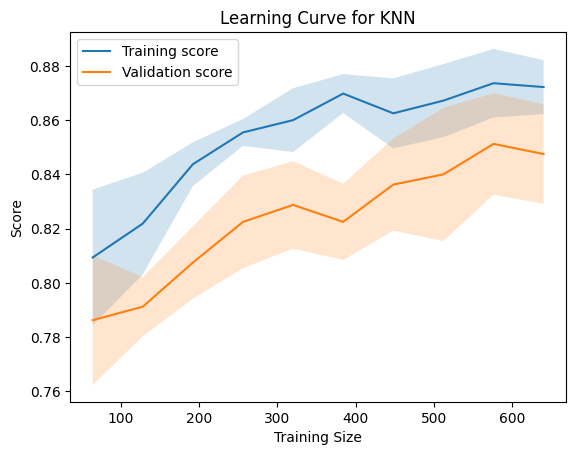

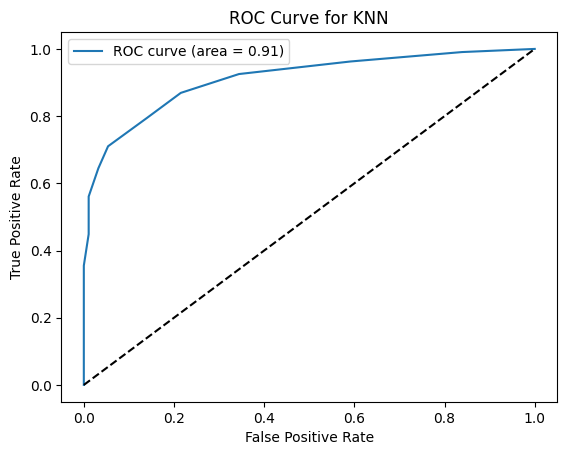

Training time: 8.65 seconds
CPU usage: 81.00%
Memory usage: 1.60%
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82
AUC: 0.91

Hyper-parameter Space Exploration:
Best parameters found by GridSearchCV: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Grid Search ran with 20 parameter combinations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

# Generate synthetic dataset for demonstration
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Create DataFrame to simulate your data structure
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 21)])
data['Social_Phobia_Level'] = y

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train = train.drop(columns=['Social_Phobia_Level'])
y_train = train['Social_Phobia_Level']
X_test_unscaled = test.drop(columns=['Social_Phobia_Level'])
y_test = test['Social_Phobia_Level']

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_unscaled)

# Parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize KNN and GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Measure training time and resources
start_time = time.time()
start_cpu = psutil.cpu_percent(interval=None)
start_memory = psutil.virtual_memory().percent

grid_search.fit(X_train_scaled, y_train)

end_time = time.time()
end_cpu = psutil.cpu_percent(interval=None)
end_memory = psutil.virtual_memory().percent

training_time = end_time - start_time
cpu_usage = end_cpu - start_cpu
memory_usage = end_memory - start_memory

# Best model from grid search
best_knn = grid_search.best_estimator_

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_knn, X_train_scaled, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve for KNN')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Predictions and performance metrics
y_pred = best_knn.predict(X_test_scaled)
y_proba = best_knn.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
roc_auc = roc_auc_score(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='best')
plt.show()

# Print metrics
print(f"Training time: {training_time:.2f} seconds")
print(f"CPU usage: {cpu_usage:.2f}%")
print(f"Memory usage: {memory_usage:.2f}%")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Hyper-parameter space exploration
print("\nHyper-parameter Space Exploration:")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Grid Search ran with {len(grid_search.cv_results_['params'])} parameter combinations.")


Fitting 9 folds for each of 27 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


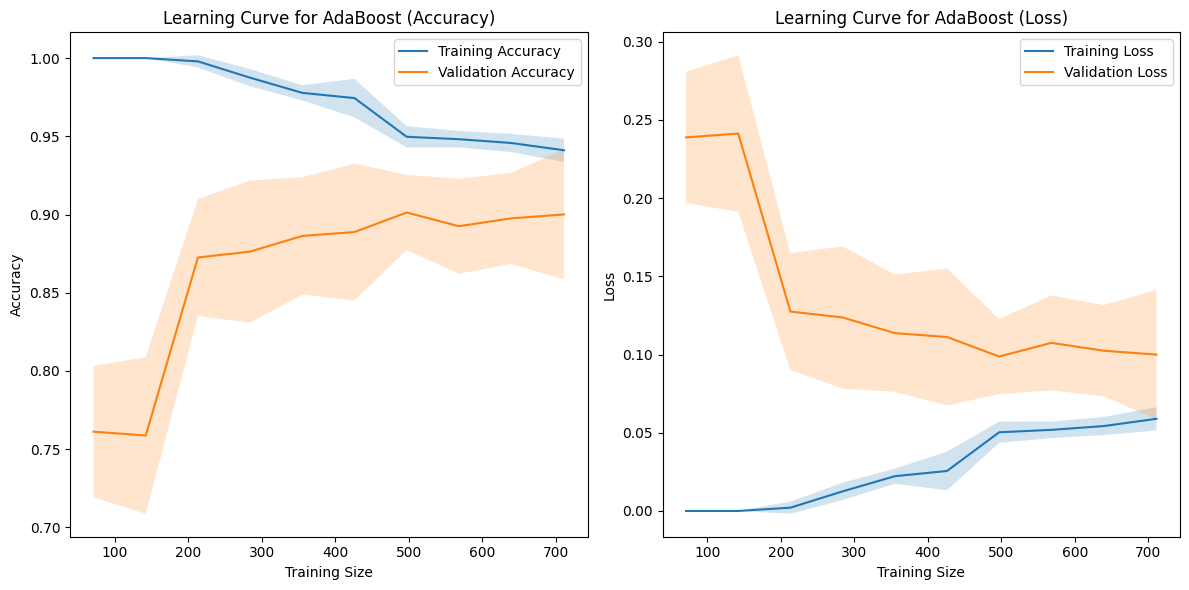

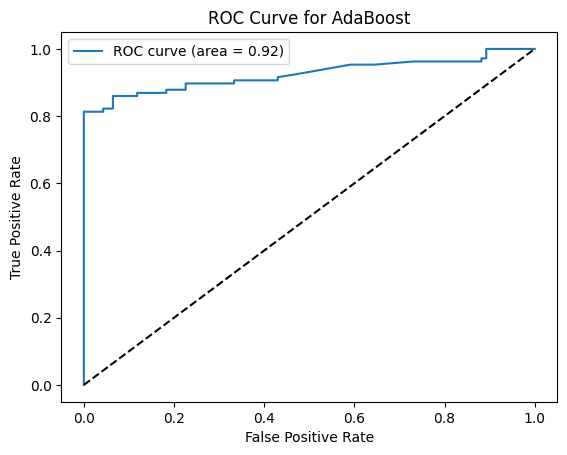

Training time: 143.46 seconds
CPU usage: 68.10%
Memory usage: -0.40%
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
AUC: 0.92

Hyper-parameter Space Exploration:
Best parameters found by GridSearchCV: {'base_estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100}
Grid Search ran with 27 parameter combinations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification


# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}

# Initialize AdaBoostClassifier with DecisionTreeClassifier as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=9, verbose=2, n_jobs=-1)

# Measure training time and resources
start_time = time.time()
start_cpu = psutil.cpu_percent(interval=None)
start_memory = psutil.virtual_memory().percent

grid_search.fit(X_train_scaled, y_train)

end_time = time.time()
end_cpu = psutil.cpu_percent(interval=None)
end_memory = psutil.virtual_memory().percent

training_time = end_time - start_time
cpu_usage = end_cpu - start_cpu
memory_usage = end_memory - start_memory

# Best model from grid search
best_ada_boost = grid_search.best_estimator_

# Learning curve with accuracy and loss curves
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    best_ada_boost, X_train_scaled, y_train, cv=9, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), return_times=True, scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)

plt.figure(figsize=(12, 6))

# Plot learning curve (Accuracy)
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve for AdaBoost (Accuracy)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot learning curve (Loss)
plt.subplot(1, 2, 2)
plt.plot(train_sizes, 1 - train_mean, label='Training Loss')
plt.plot(train_sizes, 1 - test_mean, label='Validation Loss')
plt.fill_between(train_sizes, 1 - train_mean - train_std, 1 - train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, 1 - test_mean - test_std, 1 - test_mean + test_std, alpha=0.2)
plt.title('Learning Curve for AdaBoost (Loss)')
plt.xlabel('Training Size')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Predictions and performance metrics
y_pred = best_ada_boost.predict(X_test_scaled)
y_proba = best_ada_boost.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='best')
plt.show()

# Print metrics
print(f"Training time: {training_time:.2f} seconds")
print(f"CPU usage: {cpu_usage:.2f}%")
print(f"Memory usage: {memory_usage:.2f}%")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Hyper-parameter space exploration
print("\nHyper-parameter Space Exploration:")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Grid Search ran with {len(grid_search.cv_results_['params'])} parameter combinations.")
